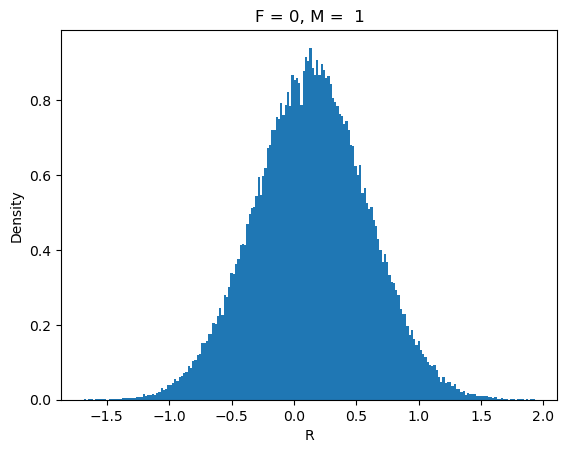

In [46]:
import numpy as np
import matplotlib.pyplot as plt

T = 2
sigma = 0.32
mu = 0.12
P0 = 100
r = 0.06
dt = 1/250
B0 = 100
alpha = 0
S0 = 100
Number_of_Simulations = 80000
N = int(T/dt)


F_list = [0, 0, 0, 85, 85]
M_list = [1, 0.5, 2, 2, 4]
mean = []
sd = []
VaR_95 = []
cVaR_95 = []

def CPPI_strategy(F, M):
    S = S0*np.ones(Number_of_Simulations)
    alpha = M*(np.maximum(0, B0*np.exp(r*dt) + 0*S - F))/S
    B = B0 - (alpha - 0)*S
    for i in range(N):
        S = S * np.exp((mu - (sigma**2)/2)*dt + sigma*np.random.normal(0, 1, Number_of_Simulations)*np.sqrt(dt))
        if i < N - 1:
            alpha_new = M*(np.maximum(0, B*np.exp(r * dt) + alpha*S - F)/S)
            B = B * np.exp(r * dt) - (alpha_new - alpha)*S
            alpha = alpha_new
            
    Pi = B + alpha*S
    R = np.log(Pi/P0)
    
    sorted_R = np.sort(R)
    index_5th = int(len(sorted_R) * 0.05)
    var = sorted_R[index_5th]
    cvar = np.mean(sorted_R[:index_5th])

    
    mean.append(np.mean(R))
    sd.append(np.std(R))
    VaR_95.append(var)
    cVaR_95.append(cvar)
    
    plt.hist(R, bins = 200, density = True)
    plt.title(f"F = {F}, M =  {M}")
    plt.xlabel("R")
    plt.ylabel("Density")
                       
    
CPPI_strategy(F_list[0], M_list[0])
                                                                                                             

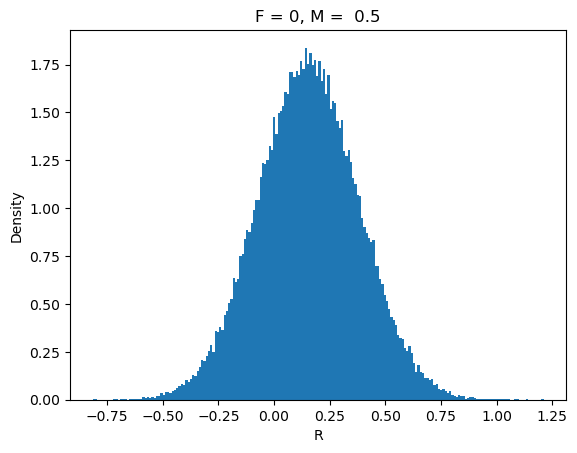

In [47]:
CPPI_strategy(F_list[1], M_list[1])

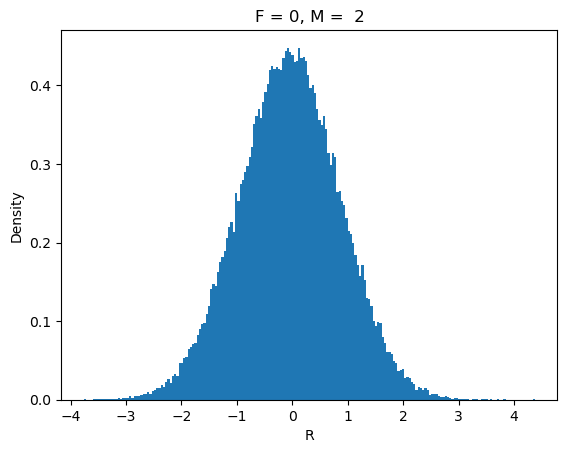

In [48]:
CPPI_strategy(F_list[2], M_list[2])

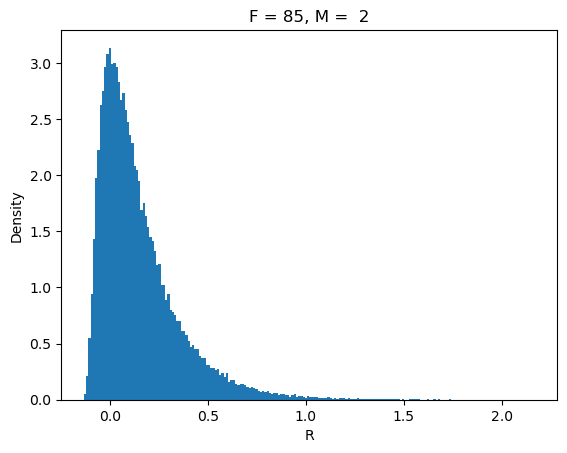

In [49]:
CPPI_strategy(F_list[3], M_list[3])

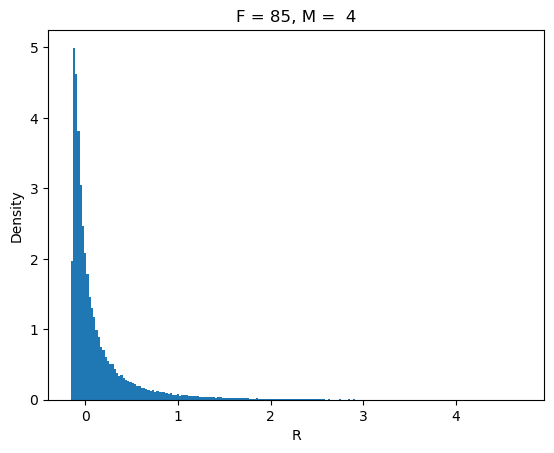

In [50]:
CPPI_strategy(F_list[4], M_list[4])

By observing the five plots above, we find that the value of R is more central because the interval of x-axis in graph "F = 0, M = 0.5" is smaller than that in "F = 0, M = 1". Also, comparing the graphs "F = 0, M = 1" and "F = 0, M = 2", we find that as M increases, the interval of x-axis becomes larger and the value of R is more discrete. Furthermore, comparing the graphs "F = 0, M = 2" and "F = 85, M = 2", we find that as F increases, the graph becomes skewed to the right, which indicates that the probability of large losses becomes smaller. The graph is generally symmetric when F = 0. Additionally, comparing the graphs "F = 85, M = 2" and "F = 85, M = 4", we find that as M increases, the return becomes larger in general.

In [57]:
print("F \t M \t Mean \t\t Standard Dev \t VaR \t \t cVaR")
for i in np.arange(len(F_list)):
    print("%d \t %0.1f \t%0.5f \t%0.5f \t%0.5f \t%0.5f" % 
          (F_list[i], M_list[i], mean[i], sd[i], VaR_95[i], cVaR_95[i]))

F 	 M 	 Mean 		 Standard Dev 	 VaR 	 	 cVaR
0 	 1.0 	0.13865 	0.45068 	-0.60444 	-0.79257
0 	 0.5 	0.15426 	0.22658 	-0.21663 	-0.31157
0 	 2.0 	-0.04630 	0.90709 	-1.53702 	-1.92187
85 	 2.0 	0.14824 	0.20573 	-0.06834 	-0.08566
85 	 4.0 	0.11912 	0.37209 	-0.13220 	-0.13937


By observing the table, we find that when F is fixed, as M increases, the standard deviation increases. Also, when F is fixed, as M increases, the values of VaR and cVaR becomes smaller, which means that the absolute values of VaR and cVaR becomes larger. Moreover, we find that when M is fixed as 2, as F increases, the mean increases and the standard deviation decreases and the absolute values of VaR and cVaR becomes smaller. This indicates that the probability of large losses becomes smaller and it is more possible to make positive return.